<a href="https://colab.research.google.com/github/sunilkumar1762/Vpatrol/blob/main/Vpatrol_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries


In [1]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Install necessary packages
!pip install geopandas folium


Exploring the Data

In [2]:
# Load the Excel file
file_path = '/content/Assingment_Dataset.xlsx'  # Replace with the actual file path
excel_data = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame
geospatial_data = pd.read_excel(excel_data, sheet_name='Geospatial Data')
satellite_details = pd.read_excel(excel_data, sheet_name='Satellite Details')
news_reports = pd.read_excel(excel_data, sheet_name='News Reports')
historical_incidents = pd.read_excel(excel_data, sheet_name='Historical Incidents')

# Create a pivot table for geospatial data
geospatial_pivot = pd.pivot_table(geospatial_data,
                                  values='Timestamp',
                                  index='Location',
                                  columns='Movement Type',
                                  aggfunc='count',
                                  fill_value=0)

print("\nGeospatial Data Pivot Table:")
print(geospatial_pivot)




Geospatial Data Pivot Table:
Movement Type        Entry  Exit
Location                        
Border Post Alpha        3     2
Border Post Bravo        3     3
Border Post Charlie      3     3
Border Post Delta        3     3
Border Post Echo         4     3


In [3]:
# Create a pivot table for Satellite Details
satellite_pivot = pd.pivot_table(satellite_details,
                                 values='Image ID',  # Check for typos and capitalization in the column name
                                 index='Date',
                                 columns='Location',  # Assuming there's a 'Status' column (e.g., Active, Inactive)
                                 aggfunc='count',  # Use 'count' as an example aggregation function
                                 fill_value=0)

print("\nSatellite Details Pivot Table:")
print(satellite_pivot)


Satellite Details Pivot Table:
Location    Border Post Alpha  Border Post Bravo  Border Post Charlie  \
Date                                                                    
2024-03-01                  1                  0                    0   
2024-03-03                  1                  0                    0   
2024-03-05                  1                  0                    0   
2024-03-07                  1                  0                    0   
2024-03-09                  1                  0                    0   
2024-03-12                  0                  1                    0   
2024-03-14                  0                  1                    0   
2024-03-17                  0                  1                    0   
2024-03-19                  0                  1                    0   
2024-03-22                  0                  1                    0   
2024-03-24                  0                  0                    1   
2024-03-27         

In [4]:

news_reports_df = excel_data.parse('News Reports')
historical_incidents_df = excel_data.parse('Historical Incidents')

# Pivot table for News Reports
news_pivot = pd.pivot_table(
    news_reports_df,
    index='Date',              # Rows by Date
    columns='Source',          # Columns by Source
    values='ID',               # Aggregate based on ID
    aggfunc='count',           # Counting occurrences
    fill_value=0               # Fill missing values with 0
)

# Pivot table for Historical Incidents
incidents_pivot = pd.pivot_table(
    historical_incidents_df,
    index='Date',              # Rows by Date
    columns='Location',        # Columns by Location
    values='Incident ID',      # Aggregate based on Incident ID
    aggfunc='count',           # Counting occurrences
    fill_value=0               # Fill missing values with 0
)

# Display the pivot tables
print("News Reports Pivot Table:")
print(news_pivot)
print("\nHistorical Incidents Pivot Table:")
print(incidents_pivot)

# If you want to save the pivot tables to a new Excel file:
with pd.ExcelWriter('Pivot_Tables.xlsx') as writer:
    news_pivot.to_excel(writer, sheet_name='News Reports Pivot')
    incidents_pivot.to_excel(writer, sheet_name='Historical Incidents Pivot')


News Reports Pivot Table:
Source      Border News  Border Watch  Defense Insider  Defense News  \
Date                                                                   
2024-03-01            0             0                0             0   
2024-03-03            0             0                0             0   
2024-03-05            0             0                0             0   
2024-03-07            0             1                0             0   
2024-03-09            0             0                0             1   
2024-03-12            0             0                0             0   
2024-03-14            0             0                0             0   
2024-03-17            1             0                0             0   
2024-03-19            0             0                0             0   
2024-03-22            0             0                0             0   
2024-03-24            0             0                1             0   
2024-03-27            0             1 

Geospatial Analysis

In [5]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Create a GeoDataFrame for geospatial data
gdf = gpd.GeoDataFrame(
    geospatial_data, geometry=gpd.points_from_xy(geospatial_data.Longitude, geospatial_data.Latitude)
)

# Create a base map
m = folium.Map(location=[geospatial_data['Latitude'].mean(), geospatial_data['Longitude'].mean()], zoom_start=6)

# Add heat map
HeatMap(data=geospatial_data[['Latitude', 'Longitude']].values, radius=10).add_to(m)

# Save the map to an HTML file
m.save('geospatial_heatmap.html')


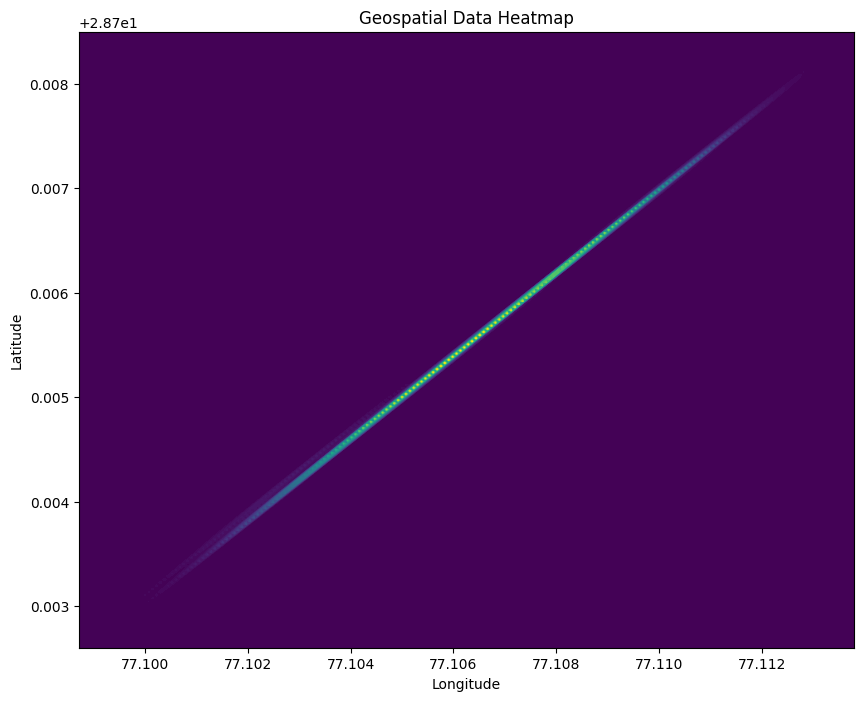

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'geospatial_data' is a DataFrame, load it from your file
geospatial_data = pd.read_excel('Assingment_Dataset.xlsx', sheet_name='Geospatial Data')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Use seaborn to create a heatmap
sns.kdeplot(
    x=geospatial_data['Longitude'],
    y=geospatial_data['Latitude'],
    cmap="viridis",
    fill=True,
    thresh=0,
    levels=100
)

# Add labels and title
plt.title('Geospatial Data Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the heatmap
plt.show()


Satellite Details Interpretation

In [7]:
import pandas as pd

# Load satellite details
satellite_details = pd.read_excel('Assingment_Dataset.xlsx', sheet_name='Satellite Details')

# Display key changes
for index, row in satellite_details.iterrows():
    print(f"Date: {row['Date']}, Location: {row['Location']}")
    print(f"Description: {row['Description']}\n")


Date: 2024-03-01 00:00:00, Location: Border Post Alpha
Description: High-resolution image showing vehicle movement

Date: 2024-03-03 00:00:00, Location: Border Post Alpha
Description: Image showing increased military presence

Date: 2024-03-05 00:00:00, Location: Border Post Alpha
Description: Image showing an empty area

Date: 2024-03-07 00:00:00, Location: Border Post Alpha
Description: Image showing troop withdrawal

Date: 2024-03-09 00:00:00, Location: Border Post Alpha
Description: Image showing new infrastructure developments

Date: 2024-03-12 00:00:00, Location: Border Post Bravo
Description: High-resolution image showing vehicle movement

Date: 2024-03-14 00:00:00, Location: Border Post Bravo
Description: Image showing increased military presence

Date: 2024-03-17 00:00:00, Location: Border Post Bravo
Description: Image showing an empty area

Date: 2024-03-19 00:00:00, Location: Border Post Bravo
Description: Image showing troop withdrawal

Date: 2024-03-22 00:00:00, Location: 

Correlation with Open-Source Intelligence (OSINT)

In [8]:
osint_data = pd.read_excel(excel_data, sheet_name='News Reports')


In [9]:

# Load the 'News Reports' sheet by name
news_reports = pd.read_excel(file_path, sheet_name='News Reports')
print("News Reports Data Preview:")
print(news_reports.head())

# Load the 'Geospatial Data' sheet by name
geospatial_data = pd.read_excel(file_path, sheet_name='Geospatial Data')
print("\nGeospatial Data Preview:")
print(geospatial_data.head())

# Find matching locations between geospatial data and news reports
matched_locations = geospatial_data[geospatial_data['Location'].isin(news_reports['Source'])]
print("\nMatched Locations:")
print(matched_locations.head())
print(f"\nNumber of matched locations: {len(matched_locations)}")


News Reports Data Preview:
   ID       Date               Source                               Title  \
0   1 2024-03-01      National News A            Border Tensions Increase   
1   2 2024-03-03  International Times  New Military Installations Spotted   
2   3 2024-03-05      Global Security            Diplomatic Talks Stalled   
3   4 2024-03-07         Border Watch      Escalation in Border Incidents   
4   5 2024-03-09         Defense News             Troop Movement Observed   

                                             Summary  
0  Rising tensions between Country A and Country ...  
1  Satellite images reveal new military installat...  
2  Diplomatic talks between Country A and Country...  
3  Reports indicate an increase in cross-border i...  
4  Significant troop movements observed along the...  

Geospatial Data Preview:
   ID           Timestamp  Latitude  Longitude           Location  \
0   1 2024-03-01 07:15:00   28.7041    77.1025  Border Post Alpha   
1   2 2024-03-02

Location
Border Post Alpha      6
Border Post Bravo      6
Border Post Charlie    6
Border Post Delta      6
Border Post Echo       6
Name: count, dtype: int64


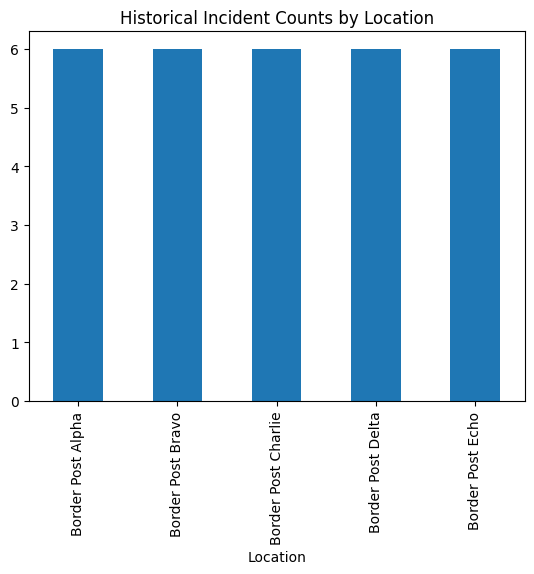

In [10]:
incident_counts = historical_incidents['Location'].value_counts()
print(incident_counts)
incident_counts.plot(kind='bar')
plt.title('Historical Incident Counts by Location')
plt.savefig('incident_counts.png')